<center><img style="align: center;" src="images/Slideshow.001.jpeg"></center>

<center><img style="align: center;" src="images/Slideshow.002.jpeg"></center>

<center><img style="align: center;" src="images/Slideshow.003.jpeg"></center>

<center><img style="align: center;" src="images/Slideshow.004.jpeg"></center>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', 100)
import warnings; warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('data.csv')
df.head(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [4]:
print(df.dtypes)

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.drop(['AnimalID', 'OutcomeSubtype'], axis=1, inplace=True)

In [8]:
np.sort(df['OutcomeType'].unique())

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'],
      dtype=object)

In [9]:
df.isnull().sum()

Name              7691
DateTime             0
OutcomeType          0
AnimalType           0
SexuponOutcome       1
AgeuponOutcome      18
Breed                0
Color                0
dtype: int64

In [10]:
df['has_name'] = df['Name'].notna()
df.drop(['Name'], axis=1, inplace=True)

In [11]:
df['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [12]:
df['SexuponOutcome'].fillna("Unknown", inplace=True)

In [13]:
df['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [14]:
df.dropna(inplace=True, subset=['AgeuponOutcome'])

In [15]:
df.isnull().any()

DateTime          False
OutcomeType       False
AnimalType        False
SexuponOutcome    False
AgeuponOutcome    False
Breed             False
Color             False
has_name          False
dtype: bool

In [16]:
df.head(10)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,True
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,True
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,True
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False
5,2014-04-25 13:04:00,Transfer,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,True
6,2015-03-28 13:11:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,True
7,2015-04-30 17:02:00,Transfer,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,False
8,2014-02-04 17:17:00,Adoption,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,True
9,2014-05-03 07:48:00,Adoption,Dog,Spayed Female,1 year,Cairn Terrier,White,False


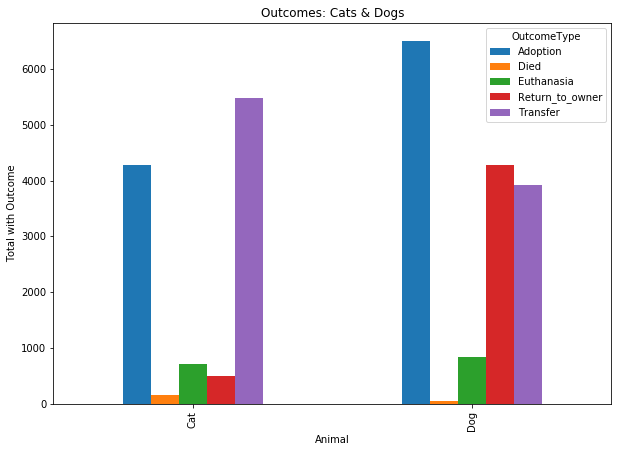

In [17]:
x = df.groupby(['AnimalType', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes: Cats & Dogs", figsize=(10,7))
ax.set_xlabel("Animal")
ax.set_ylabel("Total with Outcome");

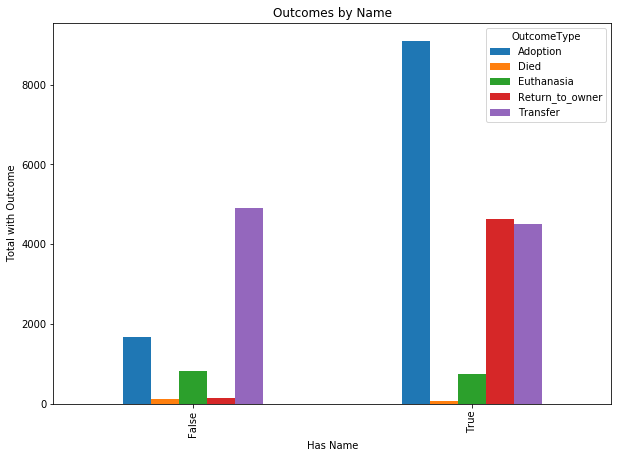

In [18]:
x = df.groupby(['has_name', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Name", figsize=(10,7))
ax.set_xlabel("Has Name")
ax.set_ylabel("Total with Outcome");

In [19]:
df.head(10)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,True
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,True
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,True
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False
5,2014-04-25 13:04:00,Transfer,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,True
6,2015-03-28 13:11:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,True
7,2015-04-30 17:02:00,Transfer,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,False
8,2014-02-04 17:17:00,Adoption,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,True
9,2014-05-03 07:48:00,Adoption,Dog,Spayed Female,1 year,Cairn Terrier,White,False


In [20]:
df['gender'] = df['SexuponOutcome'].apply(lambda x: x if  x == "Unknown" else x.split()[1])
df['neutered_status'] = df['SexuponOutcome'].apply(lambda x: x if x == "Unknown" else "Neutered" if x.split()[0] == "Spayed" else x.split()[0])
df.drop(['SexuponOutcome'], axis=1, inplace=True)

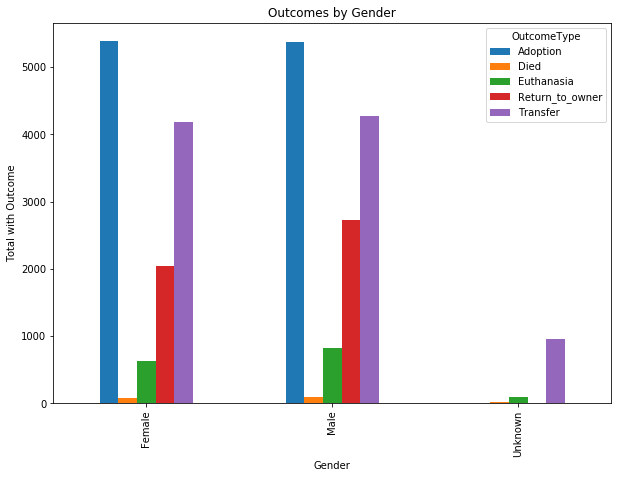

In [21]:
x = df.groupby(['gender', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Gender", figsize=(10,7))
ax.set_xlabel("Gender")
ax.set_ylabel("Total with Outcome");

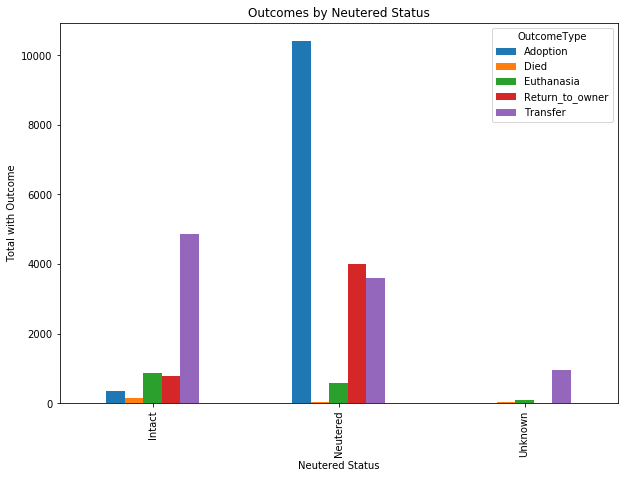

In [22]:
x = df.groupby(['neutered_status', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Neutered Status", figsize=(10,7))
ax.set_xlabel("Neutered Status")
ax.set_ylabel("Total with Outcome");

In [23]:
df.head(10)

,DateTime,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,has_name,gender,neutered_status
0,2014-02-12 18:22:00,Return_to_owner,Dog,1 year,Shetland Sheepdog Mix,Brown/White,True,Male,Neutered
1,2013-10-13 12:44:00,Euthanasia,Cat,1 year,Domestic Shorthair Mix,Cream Tabby,True,Female,Neutered
2,2015-01-31 12:28:00,Adoption,Dog,2 years,Pit Bull Mix,Blue/White,True,Male,Neutered
3,2014-07-11 19:09:00,Transfer,Cat,3 weeks,Domestic Shorthair Mix,Blue Cream,False,Male,Intact
4,2013-11-15 12:52:00,Transfer,Dog,2 years,Lhasa Apso/Miniature Poodle,Tan,False,Male,Neutered
5,2014-04-25 13:04:00,Transfer,Dog,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,True,Female,Intact
6,2015-03-28 13:11:00,Transfer,Cat,3 weeks,Domestic Shorthair Mix,Blue Tabby,True,Male,Intact
7,2015-04-30 17:02:00,Transfer,Cat,3 weeks,Domestic Shorthair Mix,Brown Tabby,False,Unknown,Unknown
8,2014-02-04 17:17:00,Adoption,Dog,5 months,American Pit Bull Terrier Mix,Red/White,True,Female,Neutered
9,2014-05-03 07:48:00,Adoption,Dog,1 year,Cairn Terrier,White,False,Female,Neutered


In [24]:
df['days_old'] = df['AgeuponOutcome'].apply(lambda x: int(x.split()[0]) * (365 if x.split()[1] in "years" else 30.5 if x.split()[1] in "months" else 7 if x.split()[1] in "weeks" else 1))
df.drop(['AgeuponOutcome'], axis=1, inplace=True)

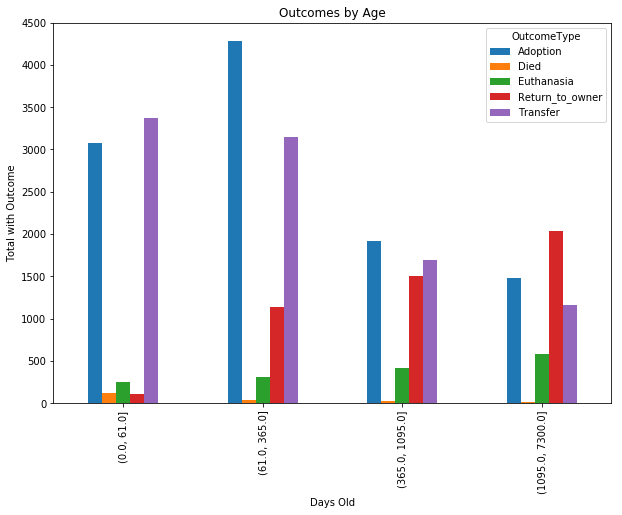

In [25]:
bins = [df['days_old'].min()] + df['days_old'].quantile([.25, .5, .75]).tolist() + [df['days_old'].max()]
df['age_category'] = pd.cut(df['days_old'], bins)
x = df.groupby(['age_category', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Age", figsize=(10,7))
ax.set_xlabel("Days Old")
ax.set_ylabel("Total with Outcome")
df.drop(['age_category'], axis=1, inplace=True)

In [26]:
df.head(10)

,DateTime,OutcomeType,AnimalType,Breed,Color,has_name,gender,neutered_status,days_old
0,2014-02-12 18:22:00,Return_to_owner,Dog,Shetland Sheepdog Mix,Brown/White,True,Male,Neutered,365.0
1,2013-10-13 12:44:00,Euthanasia,Cat,Domestic Shorthair Mix,Cream Tabby,True,Female,Neutered,365.0
2,2015-01-31 12:28:00,Adoption,Dog,Pit Bull Mix,Blue/White,True,Male,Neutered,730.0
3,2014-07-11 19:09:00,Transfer,Cat,Domestic Shorthair Mix,Blue Cream,False,Male,Intact,21.0
4,2013-11-15 12:52:00,Transfer,Dog,Lhasa Apso/Miniature Poodle,Tan,False,Male,Neutered,730.0
5,2014-04-25 13:04:00,Transfer,Dog,Cairn Terrier/Chihuahua Shorthair,Black/Tan,True,Female,Intact,30.5
6,2015-03-28 13:11:00,Transfer,Cat,Domestic Shorthair Mix,Blue Tabby,True,Male,Intact,21.0
7,2015-04-30 17:02:00,Transfer,Cat,Domestic Shorthair Mix,Brown Tabby,False,Unknown,Unknown,21.0
8,2014-02-04 17:17:00,Adoption,Dog,American Pit Bull Terrier Mix,Red/White,True,Female,Neutered,152.5
9,2014-05-03 07:48:00,Adoption,Dog,Cairn Terrier,White,False,Female,Neutered,365.0


In [27]:
df['season'] = df['DateTime'].apply(lambda x: "Winter" if x.month == 12 or x.month == 1 or x.month == 2 else "Spring" if x.month == 3 or x.month == 4 or x.month == 5 else "Summer" if x.month == 6 or x.month == 7 or x.month == 8 else "Fall")
df['weekday'] = df['DateTime'].apply(lambda x: x.weekday_name)
df['time_of_day'] = df['DateTime'].apply(lambda x: int(24 if x.hour == 0 else x.hour) + int(x.minute)/60)
df.drop(['DateTime'], axis=1, inplace=True)

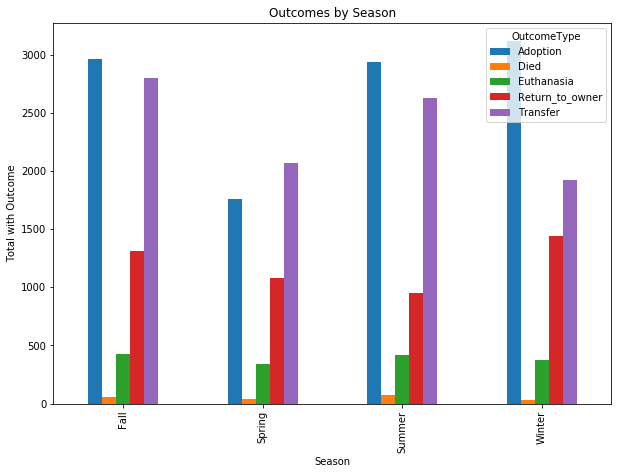

In [28]:
x = df.groupby(['season', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Season", figsize=(10,7))
ax.set_xlabel("Season")
ax.set_ylabel("Total with Outcome");

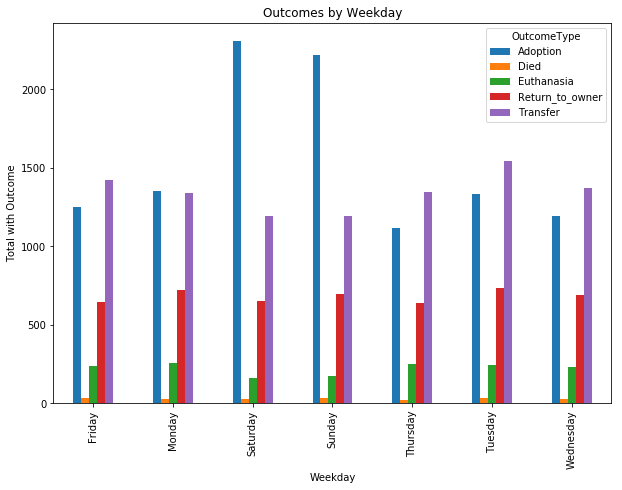

In [29]:
x = df.groupby(['weekday', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Weekday", figsize=(10,7))
ax.set_xlabel("Weekday")
ax.set_ylabel("Total with Outcome");

In [30]:
df['is_weekend'] = df['weekday'].apply(lambda x: x == "Saturday" or x == "Sunday")
df.drop(['weekday'], axis=1, inplace=True)

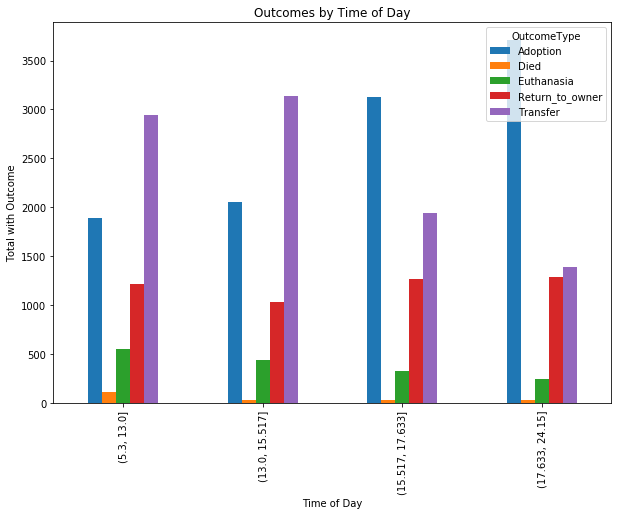

In [31]:
bins = [df['time_of_day'].min()] + df['time_of_day'].quantile([.25, .5, .75]).tolist() + [df['time_of_day'].max()]
df['time_category'] = pd.cut(df['time_of_day'], bins)
x = df.groupby(['time_category', 'OutcomeType']).size().unstack()
ax = x.plot(kind='bar', title ="Outcomes by Time of Day", figsize=(10,7))
ax.set_xlabel("Time of Day")
ax.set_ylabel("Total with Outcome")
df.drop(['time_category'], axis=1, inplace=True)

In [32]:
df.head(10)

,OutcomeType,AnimalType,Breed,Color,has_name,gender,neutered_status,days_old,season,time_of_day,is_weekend
0,Return_to_owner,Dog,Shetland Sheepdog Mix,Brown/White,True,Male,Neutered,365.0,Winter,18.366667,False
1,Euthanasia,Cat,Domestic Shorthair Mix,Cream Tabby,True,Female,Neutered,365.0,Fall,12.733333,True
2,Adoption,Dog,Pit Bull Mix,Blue/White,True,Male,Neutered,730.0,Winter,12.466667,True
3,Transfer,Cat,Domestic Shorthair Mix,Blue Cream,False,Male,Intact,21.0,Summer,19.150000,False
4,Transfer,Dog,Lhasa Apso/Miniature Poodle,Tan,False,Male,Neutered,730.0,Fall,12.866667,False
5,Transfer,Dog,Cairn Terrier/Chihuahua Shorthair,Black/Tan,True,Female,Intact,30.5,Spring,13.066667,False
6,Transfer,Cat,Domestic Shorthair Mix,Blue Tabby,True,Male,Intact,21.0,Spring,13.183333,True
7,Transfer,Cat,Domestic Shorthair Mix,Brown Tabby,False,Unknown,Unknown,21.0,Spring,17.033333,False
8,Adoption,Dog,American Pit Bull Terrier Mix,Red/White,True,Female,Neutered,152.5,Winter,17.283333,False
9,Adoption,Dog,Cairn Terrier,White,False,Female,Neutered,365.0,Spring,7.800000,True


In [33]:
breed_list = ['mix', 'domestic', 'shorthair', 'longhair', 'medium hair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'collie', 'corgi', 'dalmatian', 'daschund', 'hound', 'pit bull', 'poodle', 'retriever', 'rottweiler', 'sheepdog', 'shephard', 'spaniel', 'terrier']
for i in range(len(breed_list)):
    df[breed_list[i]] = df['Breed'].apply(lambda x: breed_list[i] in x.lower())
df.drop(['Breed'], axis=1, inplace=True)

In [34]:
colors = np.sort(df.Color.apply(lambda x: x.lower().split('/')[0].split()[0]).unique())
for i in range(len(colors)):
    df[colors[i]] = df['Color'].apply(lambda x: colors[i] in x.lower())
df.drop(['Color'], axis=1, inplace=True)

In [35]:
df.head(10)

,OutcomeType,AnimalType,has_name,gender,neutered_status,days_old,season,time_of_day,is_weekend,mix,domestic,shorthair,longhair,medium hair,beagle,boxer,bulldog,chihuahua,collie,corgi,dalmatian,daschund,hound,pit bull,poodle,retriever,rottweiler,sheepdog,shephard,spaniel,terrier,agouti,apricot,black,blue,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,orange,pink,red,ruddy,sable,seal,silver,tan,torbie,tortie,tricolor,white,yellow
0,Return_to_owner,Dog,True,Male,Neutered,365.0,Winter,18.366667,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,Euthanasia,Cat,True,Female,Neutered,365.0,Fall,12.733333,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Adoption,Dog,True,Male,Neutered,730.0,Winter,12.466667,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,Transfer,Cat,False,Male,Intact,21.0,Summer,19.150000,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Transfer,Dog,False,Male,Neutered,730.0,Fall,12.866667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,Transfer,Dog,True,Female,Intact,30.5,Spring,13.066667,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,Transfer,Cat,True,Male,Intact,21.0,Spring,13.183333,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Transfer,Cat,False,Unknown,Unknown,21.0,Spring,17.033333,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,Adoption,Dog,True,Female,Neutered,152.5,Winter,17.283333,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
9,Adoption,Dog,False,Female,Neutered,365.0,Spring,7.800000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,F

In [36]:
df = pd.concat([df, pd.get_dummies(df['AnimalType']), pd.get_dummies(df['season'], prefix='season'), pd.get_dummies(df['gender'], prefix='gender'), pd.get_dummies(df['neutered_status'], prefix='neutered_status')], axis=1)
df.drop(['AnimalType', 'season', 'gender', 'neutered_status'], axis=1, inplace=True)

In [37]:
df.head(10)

,OutcomeType,has_name,days_old,time_of_day,is_weekend,mix,domestic,shorthair,longhair,medium hair,beagle,boxer,bulldog,chihuahua,collie,corgi,dalmatian,daschund,hound,pit bull,poodle,retriever,rottweiler,sheepdog,shephard,spaniel,terrier,agouti,apricot,black,blue,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,orange,pink,red,ruddy,sable,seal,silver,tan,torbie,tortie,tricolor,white,yellow,Cat,Dog,season_Fall,season_Spring,season_Summer,season_Winter,gender_Female,gender_Male,gender_Unknown,neutered_status_Intact,neutered_status_Neutered,neutered_status_Unknown
0,Return_to_owner,True,365.0,18.366667,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0,1,0,0,0,1,0,1,0,0,1,0
1,Euthanasia,True,365.0,12.733333,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,1,0,0,0,1,0,0,0,1,0
2,Adoption,True,730.0,12.466667,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0,1,0,0,0,1,0,1,0,0,1,0
3,Transfer,False,21.0,19.150000,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,0,1,0,0,1,0,1,0,0
4,Transfer,False,730.0,12.866667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0,0,0,0,1,0,0,1,0
5,Transfer,True,30.5,13.066667,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,0,1,0,0,1,0,0,1,0,0
6,Transfer,True,21.0,13.183333,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,1,0,0,0,1,0,1,0,0
7,Transfer,False,21.0,17.033333,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,1,0,0,0,0,1,0,0,1
8,Adoption,True,152.5,17.283333,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,0,1,0,0,0,1,1,0,0,0,1,0
9,Adoption,False,365.0,7.800000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [38]:
X = df.iloc[:,1:]
y = df['OutcomeType']
categories = np.unique(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Much of the code for this function was taken from
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
def run_model(model, parameters=None):
    if (parameters == None):
        model.fit(X_train, y_train)
        print("Detailed classification report:")
        print()
        y_true, y_pred = y_test, model.predict(X_test)
    else:
        clf = GridSearchCV(model, parameters, scoring='f1_weighted')
        clf.fit(X_train, y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        print()
        print("Detailed classification report:")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), categories)

In [40]:
# Much of the code for this function was taken from
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(10,7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Best parameters set found on development set:

{'max_depth': 9}

Grid scores on development set:

0.622 (+/-0.010) for {'max_depth': 5}
0.633 (+/-0.009) for {'max_depth': 6}
0.644 (+/-0.005) for {'max_depth': 7}
0.649 (+/-0.019) for {'max_depth': 8}
0.650 (+/-0.019) for {'max_depth': 9}
0.649 (+/-0.015) for {'max_depth': 10}
0.646 (+/-0.017) for {'max_depth': 11}
0.643 (+/-0.020) for {'max_depth': 12}
0.639 (+/-0.013) for {'max_depth': 13}
0.634 (+/-0.016) for {'max_depth': 14}

Detailed classification report:

                 precision    recall  f1-score   support

       Adoption       0.68      0.84      0.75      3218
           Died       0.31      0.09      0.14        54
     Euthanasia       0.53      0.22      0.31       463
Return_to_owner       0.49      0.45      0.47      1460
       Transfer       0.77      0.67      0.72      2819

    avg / total       0.67      0.67      0.66      8014



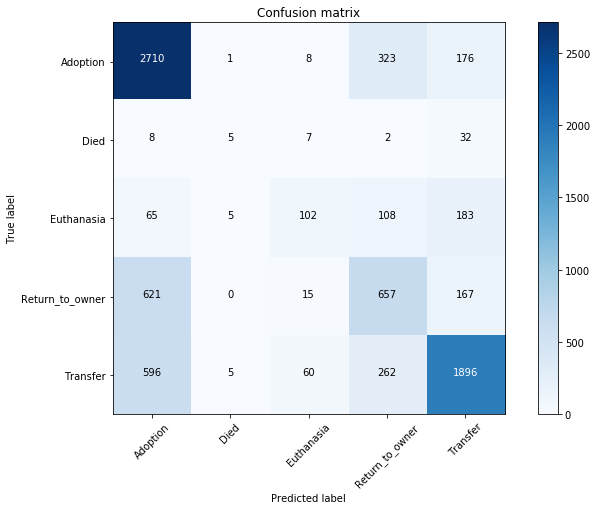

In [41]:
parameters = [{'max_depth': range(5,15)}]
run_model(DecisionTreeClassifier(random_state = 42), parameters)

Best parameters set found on development set:

{'n_neighbors': 11}

Grid scores on development set:

0.584 (+/-0.012) for {'n_neighbors': 3}
0.595 (+/-0.008) for {'n_neighbors': 4}
0.603 (+/-0.009) for {'n_neighbors': 5}
0.601 (+/-0.007) for {'n_neighbors': 6}
0.603 (+/-0.007) for {'n_neighbors': 7}
0.603 (+/-0.008) for {'n_neighbors': 8}
0.603 (+/-0.009) for {'n_neighbors': 9}
0.603 (+/-0.006) for {'n_neighbors': 10}
0.606 (+/-0.014) for {'n_neighbors': 11}
0.605 (+/-0.010) for {'n_neighbors': 12}
0.605 (+/-0.011) for {'n_neighbors': 13}
0.605 (+/-0.011) for {'n_neighbors': 14}

Detailed classification report:

                 precision    recall  f1-score   support

       Adoption       0.64      0.80      0.71      3218
           Died       0.40      0.04      0.07        54
     Euthanasia       0.48      0.10      0.17       463
Return_to_owner       0.45      0.44      0.44      1460
       Transfer       0.74      0.65      0.69      2819

    avg / total       0.63      0.64

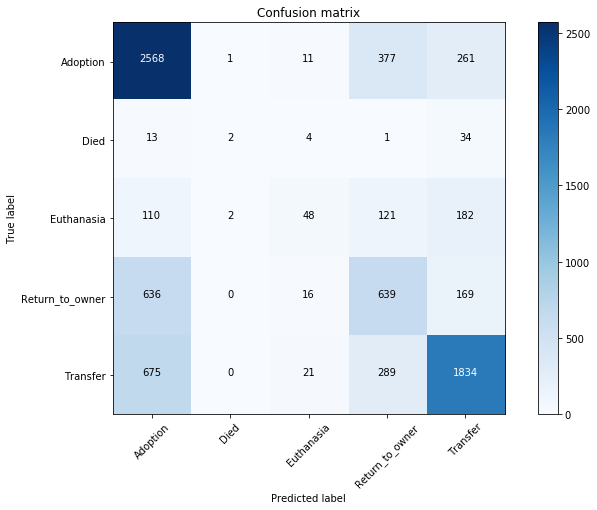

In [42]:
parameters = [{'n_neighbors': range(3,15)}]
run_model(KNeighborsClassifier(), parameters)

Best parameters set found on development set:

{'C': 1.0000000000000002}

Grid scores on development set:

0.604 (+/-0.020) for {'C': 0.1}
0.605 (+/-0.018) for {'C': 0.4}
0.605 (+/-0.017) for {'C': 0.7000000000000001}
0.605 (+/-0.019) for {'C': 1.0000000000000002}
0.605 (+/-0.017) for {'C': 1.3000000000000003}
0.605 (+/-0.017) for {'C': 1.6000000000000003}
0.605 (+/-0.017) for {'C': 1.9000000000000004}

Detailed classification report:

                 precision    recall  f1-score   support

       Adoption       0.62      0.88      0.73      3218
           Died       0.00      0.00      0.00        54
     Euthanasia       0.52      0.03      0.06       463
Return_to_owner       0.47      0.31      0.37      1460
       Transfer       0.73      0.63      0.67      2819

    avg / total       0.62      0.63      0.60      8014



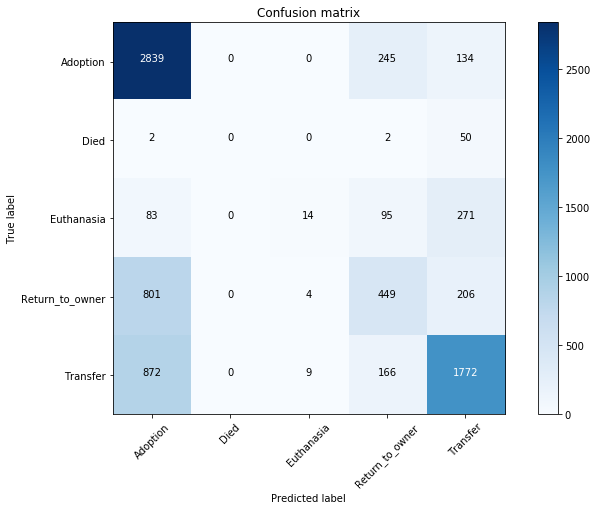

In [43]:
from sklearn.linear_model import LogisticRegression
parameters = [{'C': np.arange(0.1, 2.0, 0.3)}]
run_model(LogisticRegression(random_state=42), parameters)

Detailed classification report:

                 precision    recall  f1-score   support

       Adoption       0.66      0.82      0.73      3218
           Died       0.00      0.00      0.00        54
     Euthanasia       0.90      0.02      0.04       463
Return_to_owner       0.44      0.45      0.45      1460
       Transfer       0.74      0.67      0.70      2819

    avg / total       0.66      0.65      0.62      8014



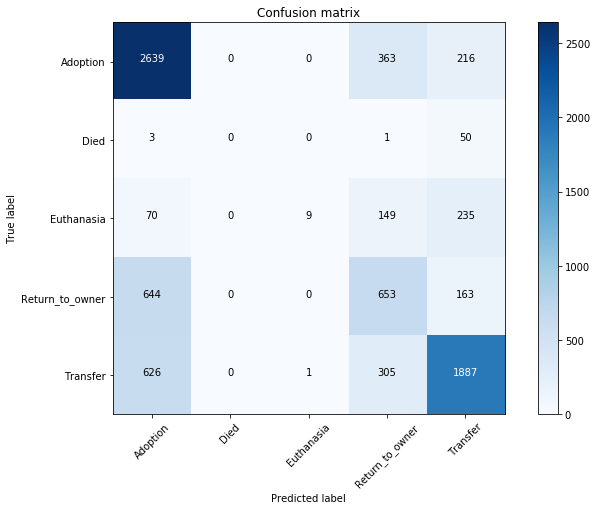

In [44]:
run_model(SVC(probability = True, random_state=42))

Best parameters set found on development set:

{'shrinkage': 'auto', 'solver': 'lsqr'}

Grid scores on development set:

0.614 (+/-0.020) for {'shrinkage': 'auto', 'solver': 'lsqr'}
0.613 (+/-0.021) for {'shrinkage': None, 'solver': 'lsqr'}
0.613 (+/-0.021) for {'solver': 'svd'}

Detailed classification report:

                 precision    recall  f1-score   support

       Adoption       0.62      0.87      0.73      3218
           Died       0.00      0.00      0.00        54
     Euthanasia       0.42      0.15      0.22       463
Return_to_owner       0.44      0.31      0.36      1460
       Transfer       0.75      0.61      0.67      2819

    avg / total       0.62      0.63      0.61      8014



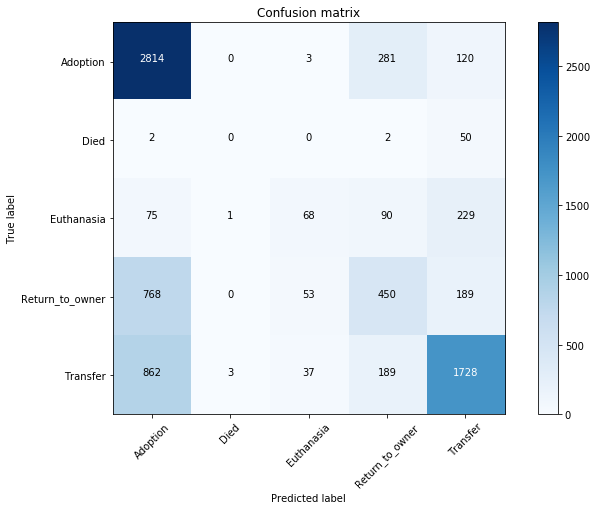

In [45]:
parameters = [{'solver': ['lsqr'], 'shrinkage': ['auto', None]}, {'solver': ['svd']}]
run_model(LinearDiscriminantAnalysis(), parameters)

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 150}

Grid scores on development set:

0.524 (+/-0.014) for {'max_depth': 5, 'n_estimators': 50}
0.524 (+/-0.015) for {'max_depth': 5, 'n_estimators': 100}
0.525 (+/-0.014) for {'max_depth': 5, 'n_estimators': 150}
0.616 (+/-0.020) for {'max_depth': 10, 'n_estimators': 50}
0.612 (+/-0.016) for {'max_depth': 10, 'n_estimators': 100}
0.611 (+/-0.017) for {'max_depth': 10, 'n_estimators': 150}
0.643 (+/-0.018) for {'max_depth': 15, 'n_estimators': 50}
0.645 (+/-0.013) for {'max_depth': 15, 'n_estimators': 100}
0.645 (+/-0.010) for {'max_depth': 15, 'n_estimators': 150}
0.643 (+/-0.011) for {'max_depth': 20, 'n_estimators': 50}
0.648 (+/-0.010) for {'max_depth': 20, 'n_estimators': 100}
0.649 (+/-0.010) for {'max_depth': 20, 'n_estimators': 150}
0.639 (+/-0.009) for {'max_depth': 25, 'n_estimators': 50}
0.642 (+/-0.011) for {'max_depth': 25, 'n_estimators': 100}
0.643 (+/-0.010) for {'max_depth': 25, 'n_estima

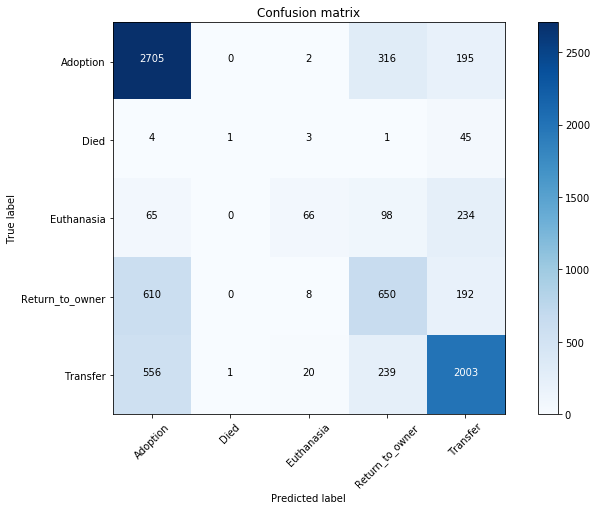

In [46]:
parameters = [{'max_depth' : range(5, 41, 5), 'n_estimators' : range(50,151,50)}]
run_model(RandomForestClassifier(random_state=42), parameters)

Detailed classification report:

                 precision    recall  f1-score   support

       Adoption       0.70      0.84      0.76      3218
           Died       0.25      0.02      0.03        54
     Euthanasia       0.69      0.15      0.25       463
Return_to_owner       0.50      0.48      0.49      1460
       Transfer       0.76      0.71      0.73      2819

    avg / total       0.68      0.68      0.67      8014



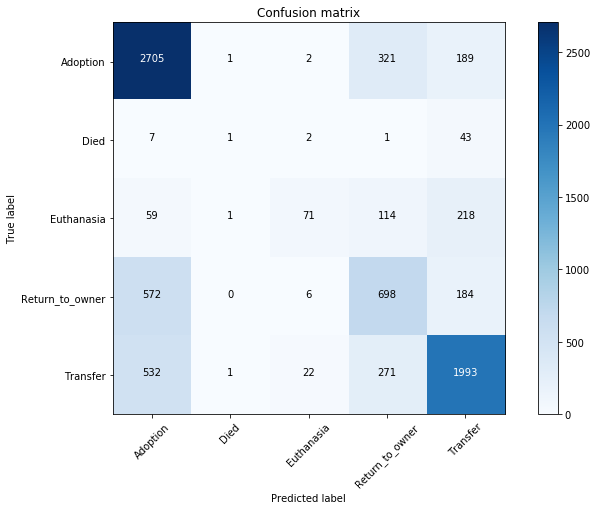

In [47]:
rfc = RandomForestClassifier(max_depth = 20, n_estimators = 150, random_state=42)
dtc = DecisionTreeClassifier(max_depth = 9, random_state = 42)
knc = KNeighborsClassifier(n_neighbors = 11)

run_model(VotingClassifier(estimators = [('rfc', rfc), ('dtc', dtc), ('knc', knc)], voting = 'soft'))

<center><img style="align: center;" src="images/Slideshow.005.jpeg"></center>